In [231]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [232]:
df = pd.read_csv("./../churn_data.csv")

df.describe(include='all')

,churn,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000,4951.000000,4950,4950,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000,4950.000000
unique,2,NaN,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,No,NaN,no,no,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,4293,NaN,4481,3638,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,100.238295,NaN,NaN,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,NaN,39.718817,NaN,NaN,13.552928,53.926625,19.844529,9.148881,50.486434,19.837380,4.300503,50.498290,19.939450,2.276812,2.763712,2.448457,0.744552,1.305279
min,NaN,1.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,73.000000,NaN,NaN,0.000000,143.700000,87.000000,24.430000,166.425000,87.000000,14.130000,167.000000,87.000000,7.510000,8.500000,3.000000,2.300000,1.000000
50%,NaN,100.000000,NaN,NaN,0.000000,180.100000,100.000000,30.600000,201.000000,101.000000,17.090000,200.550000,100.000000,9.010000,10.300000,4.000000,2.780000,1.000000
75%,NaN,127.000000,NaN,NaN,17.000000,216.200000,113.000000,36.720000,234.100000,114.000000,19.897500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000


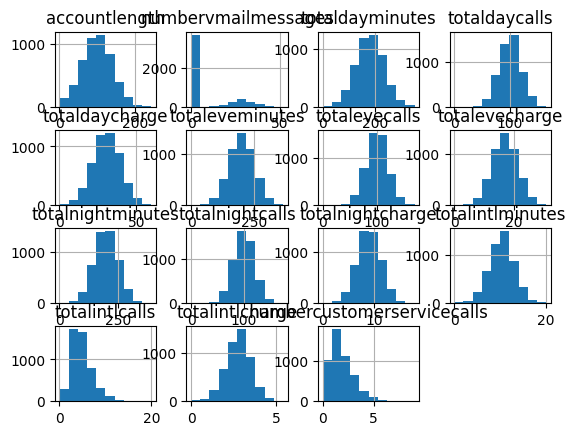

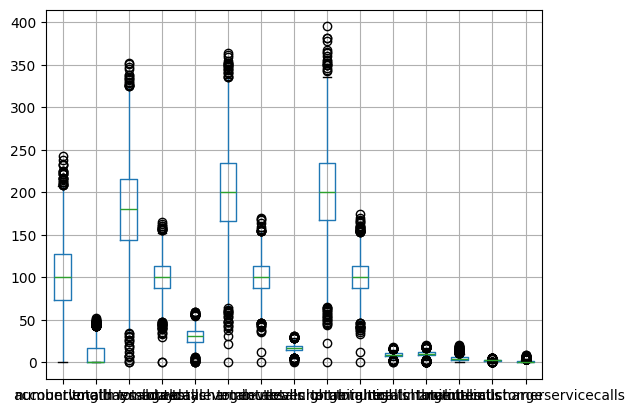

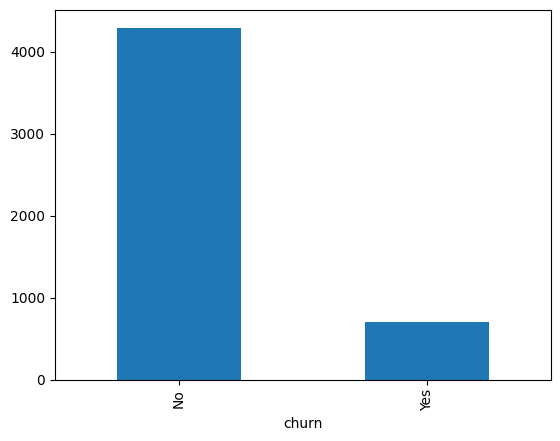

churn
No     4293
Yes     707
Name: count, dtype: int64

In [233]:
df.hist()
plt.show()

df.boxplot()
plt.show()

df['churn'].value_counts().plot.bar()
plt.show()

df['churn'].value_counts()

In [234]:
# sns.set(style="ticks")
# sns.pairplot(df, hue="churn", markers=["o", "s"])

# plt.legend(title="Churn", loc="upper right")

# plt.show()

# Handling missing data

In [235]:
mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")

rows with missing values: 793
total number of rows: 5000


In [236]:

#data imputation
numerical_cols = df.select_dtypes(include='number')
imputer = SimpleImputer(strategy='mean')
df[numerical_cols.columns] = imputer.fit_transform(numerical_cols)


categorical_cols = df.select_dtypes(exclude='number')
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols.columns] = imputer.fit_transform(categorical_cols)

mv = np.where(pd.isnull(df))
print(f"rows with missing values: {len(np.unique(mv[0]))}\ntotal number of rows: {len(df)}")

#dropping missing values
df = df.dropna()

df.describe()

rows with missing values: 0
total number of rows: 5000


,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.523676,13.484979,53.656260,19.745037,9.103012,50.233317,19.737924,4.278942,50.245113,19.839483,2.265397,2.749856,2.436181,0.740819,1.298735
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,144.075000,87.000000,24.495000,166.900000,87.000000,14.177500,167.375000,87.000000,7.520000,8.500000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.306625,100.000000,30.629386,200.679798,100.243838,17.048293,200.465697,100.000000,9.015240,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,215.900000,113.000000,36.690000,233.800000,113.000000,19.862500,234.025000,113.000000,10.520000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Dealing with Outliers

In [237]:
def remove_outliers (df,cols):
    new_df = df.copy()
    for col in cols:
        q1 = np.percentile(new_df[col], 25)
        q3 = np.percentile(new_df[col], 75)
        iqr = q3-q1

        upper = q3 + 1.5*iqr
        lower = q1 - 1.5*iqr

        upper_array = np.where(df[col]>=upper)[0]
        lower_array = np.where(df[col]<=lower)[0]

        new_df = new_df.drop(index=upper_array)
        new_df = new_df.drop(index=lower_array)
        return new_df

df.describe()

,accountlength,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,100.238295,7.763636,180.306625,100.038788,30.629386,200.679798,100.243838,17.048293,200.465697,99.932929,9.015240,10.259010,4.432525,2.772088,1.569091
std,39.523676,13.484979,53.656260,19.745037,9.103012,50.233317,19.737924,4.278942,50.245113,19.839483,2.265397,2.749856,2.436181,0.740819,1.298735
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,144.075000,87.000000,24.495000,166.900000,87.000000,14.177500,167.375000,87.000000,7.520000,8.500000,3.000000,2.320000,1.000000
50%,100.000000,0.000000,180.306625,100.000000,30.629386,200.679798,100.243838,17.048293,200.465697,100.000000,9.015240,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,215.900000,113.000000,36.690000,233.800000,113.000000,19.862500,234.025000,113.000000,10.520000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


# Handling Categorical Data

In [238]:
df['internationalplan'] = df['internationalplan'].map({
    'yes': 0,
    'no' : 1
})

df['voicemailplan'] = df['voicemailplan'].map({
    'yes': 0,
    'no' : 1
})

# Data Scaling

In [239]:
numerical_columns = df.select_dtypes(include=['float64']).columns

minMaxScaler = MinMaxScaler()
minMaxScaler.fit(df.loc[:,numerical_columns])
df.loc[:,numerical_columns] = minMaxScaler.transform(df.loc[:,numerical_columns])

df.describe()

,accountlength,internationalplan,voicemailplan,numbervmailmessages,totaldayminutes,totaldaycalls,totaldaycharge,totaleveminutes,totalevecalls,totalevecharge,totalnightminutes,totalnightcalls,totalnightcharge,totalintlminutes,totalintlcalls,totalintlcharge,numbercustomerservicecalls
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.410076,0.906200,0.737600,0.149301,0.512963,0.606296,0.512540,0.551773,0.589670,0.551546,0.507508,0.571045,0.507329,0.512951,0.221626,0.513350,0.174343
std,0.163321,0.291579,0.439983,0.259327,0.152649,0.119667,0.152326,0.138117,0.116105,0.138432,0.127203,0.113368,0.127484,0.137493,0.121809,0.137189,0.144304
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.297521,1.000000,0.000000,0.000000,0.409886,0.527273,0.409890,0.458895,0.511765,0.458670,0.423734,0.497143,0.423185,0.425000,0.150000,0.429630,0.111111
50%,0.409091,1.000000,1.000000,0.000000,0.512963,0.606061,0.512540,0.551773,0.589670,0.551546,0.507508,0.571429,0.507329,0.515000,0.200000,0.514815,0.111111
75%,0.520661,1.000000,1.000000,0.307692,0.614225,0.684848,0.613956,0.642838,0.664706,0.642591,0.592468,0.645714,0.592009,0.600000,0.300000,0.600000,0.222222
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Splitting

In [240]:
numerical_columns = df.select_dtypes(include=['float64']).columns

x = df[numerical_columns]
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Handling Imbalanced Data

In [241]:
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# Display class distribution after oversampling
print("\nClass distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

# Apply RandomUnderSampler to address class imbalance
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Display class distribution after undersampling
print("\nClass distribution after undersampling:")
print(pd.Series(y_resampled).value_counts())


Class distribution after oversampling:
churn
No     3432
Yes    3432
Name: count, dtype: int64

Class distribution after undersampling:
churn
No     568
Yes    568
Name: count, dtype: int64
